In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
import seaborn as sns; sns.set_theme(color_codes=True)
import os
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.metrics
import sklearn.datasets
import warnings
import random
warnings.filterwarnings("ignore")

In [2]:
import statistics

In [3]:
import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
sns.set_style(style='white')

In [5]:
meqtls = pd.read_csv("../Carter Lab Datasets/meQTL Data/unique_meqtls.csv")
meqtls

,Unnamed: 0,Unnamed: 0.1,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp
0,0,0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33952621
1,1,1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33954560
2,2,2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33953186
3,3,3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91676709
4,4,4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91677926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236137,1236137,293433,UCEC,rs60260871,chr3:124711371,C/T,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711371
1236138,1236138,293434,UCEC,rs57574713,chr3:124711386,G/A,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711386
1236139,1236139,293449,UCEC,rs10903612,chr10:2018353,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2018353
1236140,1236140,293450,UCEC,rs4880953,chr10:2019373,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2019373


In [6]:
meqtls["probe_chr"]=meqtls["probe_position"].str.split(":").str[0]
meqtls["probe_bp"]=meqtls["probe_position"].str.split(":").str[1]
meqtls

,Unnamed: 0,Unnamed: 0.1,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp,probe_chr,probe_bp
0,0,0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33952621,chr2,33951647
1,1,1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33954560,chr2,33951647
2,2,2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33953186,chr2,33951647
3,3,3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91676709,chr8,91681699
4,4,4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91677926,chr8,91681699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236137,1236137,293433,UCEC,rs60260871,chr3:124711371,C/T,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711371,chr3,124705145
1236138,1236138,293434,UCEC,rs57574713,chr3:124711386,G/A,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711386,chr3,124705145
1236139,1236139,293449,UCEC,rs10903612,chr10:2018353,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2018353,chr10,1416569
1236140,1236140,293450,UCEC,rs4880953,chr10:2019373,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2019373,chr10,1416569


In [52]:
meqtls["beta"].isna().sum()

0

In [7]:
meqtls["probe_bp"]=pd.to_numeric(meqtls["probe_bp"])

In [8]:
common_TADs = pd.read_csv("../Carter Lab Datasets\common_TADs_meQTLs.csv")
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K27me3,H4K20me1,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,...,0.167622,0.705304,206,4,71,141,950000,0.062006,0.021654,0.047834
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,...,0.226065,0.369001,219,4,122,97,825000,0.075906,0.042846,0.037893
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,...,0.275085,0.000000,283,4,90,194,340000,0.238009,0.076695,0.183891
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,...,0.244738,0.000000,301,4,201,189,655000,0.131405,0.088911,0.092995
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,...,0.499037,0.704529,38,0,26,22,205000,0.053005,0.036747,0.034587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,...,0.000000,0.000000,0,0,0,0,205000,0.000000,0.000000,0.000000
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,...,1.000000,0.000000,0,1,0,0,250000,0.000000,0.000000,0.000000
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,...,0.000000,1.000000,0,1,0,0,235000,0.000000,0.000000,0.000000
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,...,0.000000,0.000000,0,1,0,0,155000,0.000000,0.000000,0.000000


In [9]:
print("Num Active:", len(common_TADs[(common_TADs["KMeans_State_Labels"] == 2) | (common_TADs["KMeans_State_Labels"] == 3)]))
print("Num Inactive:", len(common_TADs[(common_TADs["KMeans_State_Labels"] == 1) | (common_TADs["KMeans_State_Labels"] == 4)]))

Num Active: 222
Num Inactive: 626


In [10]:
common_TADs = common_TADs.sort_values(["chr1", "x1"])
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K27me3,H4K20me1,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
26,26,1,7295000,7710000,1,7295000,7710000,"255,255,0",0.81273,0.053374,...,0.274394,0.000000,239,4,102,197,415000,0.164678,0.071212,0.152988
10,10,1,7715000,8010000,1,7715000,8010000,"255,255,0",1.23070,0.045249,...,0.460006,0.000000,528,4,409,335,295000,0.511798,0.401701,0.365983
91,91,1,8030000,8410000,1,8030000,8410000,"255,255,0",1.76650,0.056312,...,1.000000,0.707106,245,1,180,99,380000,0.184361,0.137243,0.083963
131,131,1,9170000,9295000,1,9170000,9295000,"255,255,0",1.21450,0.022215,...,0.356945,1.000000,51,0,49,41,125000,0.116667,0.113576,0.105709
68,68,1,9330000,9550000,1,9330000,9550000,"255,255,0",1.51850,0.048085,...,1.000000,0.000000,74,4,43,42,220000,0.096182,0.056630,0.061527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1088,X,108950000,109125000,X,108950000,109125000,"255,255,0",1.64140,0.051367,...,0.000000,0.000000,0,1,0,0,175000,0.000000,0.000000,0.000000
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.09450,0.040047,...,0.000000,1.000000,0,1,0,0,235000,0.000000,0.000000,0.000000
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.26780,0.032125,...,0.000000,0.000000,0,0,0,0,205000,0.000000,0.000000,0.000000
1091,1091,X,133635000,133905000,X,133635000,133905000,"255,255,0",1.55090,0.059014,...,0.707107,0.000000,0,1,0,0,270000,0.000000,0.000000,0.000000


In [11]:
common_TADs.reset_index(drop=True, inplace=True)
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K27me3,H4K20me1,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
0,26,1,7295000,7710000,1,7295000,7710000,"255,255,0",0.81273,0.053374,...,0.274394,0.000000,239,4,102,197,415000,0.164678,0.071212,0.152988
1,10,1,7715000,8010000,1,7715000,8010000,"255,255,0",1.23070,0.045249,...,0.460006,0.000000,528,4,409,335,295000,0.511798,0.401701,0.365983
2,91,1,8030000,8410000,1,8030000,8410000,"255,255,0",1.76650,0.056312,...,1.000000,0.707106,245,1,180,99,380000,0.184361,0.137243,0.083963
3,131,1,9170000,9295000,1,9170000,9295000,"255,255,0",1.21450,0.022215,...,0.356945,1.000000,51,0,49,41,125000,0.116667,0.113576,0.105709
4,68,1,9330000,9550000,1,9330000,9550000,"255,255,0",1.51850,0.048085,...,1.000000,0.000000,74,4,43,42,220000,0.096182,0.056630,0.061527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1088,X,108950000,109125000,X,108950000,109125000,"255,255,0",1.64140,0.051367,...,0.000000,0.000000,0,1,0,0,175000,0.000000,0.000000,0.000000
1096,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.09450,0.040047,...,0.000000,1.000000,0,1,0,0,235000,0.000000,0.000000,0.000000
1097,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.26780,0.032125,...,0.000000,0.000000,0,0,0,0,205000,0.000000,0.000000,0.000000
1098,1091,X,133635000,133905000,X,133635000,133905000,"255,255,0",1.55090,0.059014,...,0.707107,0.000000,0,1,0,0,270000,0.000000,0.000000,0.000000


In [13]:
boundary_regions = pd.DataFrame()
chr1 = []
x1 = []
x2 = []
for i, row in common_TADs.iterrows():
    if i+1 < len(common_TADs):
        if row["chr1"] == common_TADs.iloc[i+1]["chr1"]:
            chr1.append(row["chr1"])
            x1.append(row["x2"])
            x2.append(common_TADs.iloc[i+1]["x1"])
boundary_regions["chr1"] = chr1
boundary_regions["x1"] = x1
boundary_regions["x2"] = x2
boundary_regions

,chr1,x1,x2
0,1,7710000,7715000
1,1,8010000,8030000
2,1,8410000,9170000
3,1,9295000,9330000
4,1,9550000,11075000
...,...,...,...
1072,X,108880000,108950000
1073,X,109125000,109150000
1074,X,109385000,117750000
1075,X,117955000,133635000


In [56]:
boundary_regions.to_csv("Carter Lab Datasets/boundary_regions.csv")

In [14]:
TADs = []
for i, row in meqtls.iterrows():
    if i % 100000 == 0:
        print(i)
    common_chr = common_TADs["chr"+common_TADs["chr1"] == row["chr"]]
    overlap_TAD = common_chr[(row["bp"] >= common_chr["x1"]) & (row["bp"] <= common_chr["x2"])]
    if len(overlap_TAD) > 0:
        if overlap_TAD.iloc[0]["KMeans_State_Labels"] == 0:
            TADs.append("Mixed")
        elif overlap_TAD.iloc[0]["KMeans_State_Labels"] == 1 or overlap_TAD.iloc[0]["KMeans_State_Labels"] == 4:
            TADs.append("Inactive")
        else:
            TADs.append("Active")
    else:
        boundary_chr = boundary_regions["chr"+common_TADs["chr1"] == row["chr"]]
        boundary_overlap = boundary_chr[(row["bp"] >= boundary_chr["x1"]) & (row["bp"] <= boundary_chr["x2"])]
        if len(boundary_overlap) > 0:
            TADs.append("Boundary")
        else:
            TADs.append("Neither")
meqtls["TAD Type"] = TADs
meqtls

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000


KeyboardInterrupt: 

In [ ]:
probe_TADs = []
for i, row in meqtls.iterrows():
    if i % 1000000 == 0:
        print(i)
    common_chr = common_TADs["chr"+common_TADs["chr1"] == row["probe_chr"]]
    overlap_TAD = common_chr[(row["probe_bp"] >= common_chr["x1"]) & (row["probe_bp"] <= common_chr["x2"])]
    if len(overlap_TAD) > 0:
        if overlap_TAD.iloc[0]["KMeans_State_Labels"] == 0:
            probe_TADs.append("Mixed")
        elif overlap_TAD.iloc[0]["KMeans_State_Labels"] == 1 or overlap_TAD.iloc[0]["KMeans_State_Labels"] == 4:
            probe_TADs.append("Inactive")
        else:
            probe_TADs.append("Active")
    else:
        boundary_chr = boundary_regions["chr"+common_TADs["chr1"] == row["probe_chr"]]
        boundary_overlap = boundary_chr[(row["probe_bp"] >= boundary_chr["x1"]) & (row["probe_bp"] <= boundary_chr["x2"])]
        if len(boundary_overlap) > 0:
            probe_TADs.append("Boundary")
        else:
            probe_TADs.append("Neither")
meqtls["Probe TAD Type"] = probe_TADs
meqtls

In [30]:
meqtls["TAD Type"] = meqtls["TAD Type"].astype(str)

In [31]:
meqtls["Categorical TAD Type"] = meqtls["TAD Type"].astype("category")
meqtls

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp,probe_chr,probe_bp,TAD Type,Probe TAD Type,Categorical TAD Type
0,0,0,0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,...,NaN,NaN,NaN,chr2,33952621,chr2,33951647,Neither,Neither,Neither
1,1,1,1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,...,NaN,NaN,NaN,chr2,33954560,chr2,33951647,Neither,Neither,Neither
2,2,2,2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,...,NaN,NaN,NaN,chr2,33953186,chr2,33951647,Neither,Neither,Neither
3,3,3,3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,...,NaN,NaN,NaN,chr8,91676709,chr8,91681699,Boundary,Boundary,Boundary
4,4,4,4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,...,NaN,NaN,NaN,chr8,91677926,chr8,91681699,Boundary,Boundary,Boundary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236137,1236137,1236137,293433,UCEC,rs60260871,chr3:124711371,C/T,cg11029367,chr3:124705145,HEG1,...,NaN,NaN,NaN,chr3,124711371,chr3,124705145,Boundary,Boundary,Boundary
1236138,1236138,1236138,293434,UCEC,rs57574713,chr3:124711386,G/A,cg11029367,chr3:124705145,HEG1,...,NaN,NaN,NaN,chr3,124711386,chr3,124705145,Boundary,Boundary,Boundary
1236139,1236139,1236139,293449,UCEC,rs10903612,chr10:2018353,C/T,cg16296438,chr10:1416569,ADARB2,...,NaN,NaN,NaN,chr10,2018353,chr10,1416569,Neither,Neither,Neither
1236140,1236140,1236140,293450,UCEC,rs4880953,chr10:2019373,C/T,cg16296438,chr10:1416569,ADARB2,...,NaN,NaN,NaN,chr10,2019373,chr10,1416569,Neither,Neither,Neither


In [12]:
print(len(meqtls[meqtls["TAD Type"] == meqtls["Probe TAD Type"]]))

1138672


In [13]:
print((10820624/11616299)*100)

93.15035709738531


In [14]:
meqtls.to_csv("Carter Lab Datasets/meQTL Data/all_cancer_meqtls_TAD_activity.csv")

In [15]:
meqtls = pd.read_csv("../Carter Lab Datasets/meQTL Data/all_cancer_meqtls_TAD_activity.csv")
meqtls

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp,probe_chr,probe_bp,TAD Type,Probe TAD Type
0,0,0,0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,...,NaN,NaN,NaN,NaN,chr2,33952621,chr2,33951647,Neither,Neither
1,1,1,1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,...,NaN,NaN,NaN,NaN,chr2,33954560,chr2,33951647,Neither,Neither
2,2,2,2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,...,NaN,NaN,NaN,NaN,chr2,33953186,chr2,33951647,Neither,Neither
3,3,3,3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,...,NaN,NaN,NaN,NaN,chr8,91676709,chr8,91681699,Boundary,Boundary
4,4,4,4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,...,NaN,NaN,NaN,NaN,chr8,91677926,chr8,91681699,Boundary,Boundary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236137,1236137,1236137,293433,UCEC,rs60260871,chr3:124711371,C/T,cg11029367,chr3:124705145,HEG1,...,NaN,NaN,NaN,NaN,chr3,124711371,chr3,124705145,Boundary,Boundary
1236138,1236138,1236138,293434,UCEC,rs57574713,chr3:124711386,G/A,cg11029367,chr3:124705145,HEG1,...,NaN,NaN,NaN,NaN,chr3,124711386,chr3,124705145,Boundary,Boundary
1236139,1236139,1236139,293449,UCEC,rs10903612,chr10:2018353,C/T,cg16296438,chr10:1416569,ADARB2,...,NaN,NaN,NaN,NaN,chr10,2018353,chr10,1416569,Neither,Neither
1236140,1236140,1236140,293450,UCEC,rs4880953,chr10:2019373,C/T,cg16296438,chr10:1416569,ADARB2,...,NaN,NaN,NaN,NaN,chr10,2019373,chr10,1416569,Neither,Neither


In [15]:
print(pd.unique(meqtls["TAD Type"]))

['Neither' 'Boundary' 'Inactive' 'Mixed' 'Active']


In [16]:
driver_genes = pd.read_csv("../Carter Lab Datasets/Cancer Driver Genes/cancer_driver_genes.csv")
driver_genes

,Gene Symbol,Name,Entrez GeneId,Genome Location,Tier,Hallmark,Chr Band,Somatic,Germline,Tumour Types(Somatic),Tumour Types(Germline),Cancer Syndrome,Tissue Type,Molecular Genetics,Role in Cancer,Mutation Types,Translocation Partner,Other Germline Mut,Other Syndrome,Synonyms
0,A1CF,APOBEC1 complementation factor,29974.0,10:50799421-50885675,2,NaN,11.23,yes,NaN,melanoma,NaN,NaN,E,NaN,oncogene,Mis,NaN,NaN,NaN,"29974,A1CF,ACF,ACF64,ACF65,APOBEC1CF,ASP,ENSG0..."
1,ABI1,abl-interactor 1,10006.0,10:26746593-26860935,1,Yes,12.10,yes,NaN,AML,NaN,NaN,L,Dom,"TSG, fusion",T,KMT2A,NaN,NaN,"10006,ABI-1,ABI1,E3B1,ENSG00000136754.17,Q8IZP..."
2,ABL1,v-abl Abelson murine leukemia viral oncogene h...,25.0,9:130713946-130885683,1,Yes,34.12,yes,NaN,"CML, ALL, T-ALL",NaN,NaN,L,Dom,"oncogene, fusion","T, Mis","BCR, ETV6, NUP214",NaN,NaN,"25,ABL,ABL1,ENSG00000097007.17,JTK7,P00519,c-A..."
3,ABL2,"c-abl oncogene 2, non-receptor tyrosine kinase",27.0,1:179099327-179229601,1,NaN,25.20,yes,NaN,AML,NaN,NaN,L,Dom,"oncogene, fusion",T,ETV6,NaN,NaN,"27,ABL2,ABLL,ARG,ENSG00000143322.19,P42684"
4,ACKR3,atypical chemokine receptor 3,57007.0,2:236569641-236582358,1,Yes,37.30,yes,NaN,lipoma,NaN,NaN,M,Dom,"oncogene, fusion",T,HMGA2,NaN,NaN,"57007,ACKR3,CMKOR1,CXCR7,ENSG00000144476.5,GPR..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,ZNF429,zinc finger protein 429,353088.0,19:21505564-21538078,2,NaN,12.00,yes,NaN,GBM,NaN,NaN,O,NaN,NaN,Mis,NaN,NaN,NaN,"353088,ENSG00000197013.9,Q86V71,ZNF429"
719,ZNF479,zinc finger protein 479,90827.0,7:57119614-57139864,2,NaN,11.20,yes,NaN,"lung cancer, bladder carcinoma, prostate carci...",NaN,NaN,E,NaN,NaN,Mis,NaN,NaN,NaN,"90827,ENSG00000185177.12,KR19,Q96JC4,ZNF479"
720,ZNF521,zinc finger protein 521,25925.0,18:25061926-25352152,1,NaN,11.20,yes,NaN,ALL,NaN,NaN,L,Dom,"oncogene, fusion",T,PAX5,NaN,NaN,"25925,EHZF,ENSG00000198795.10,Evi3,Q96K83,ZNF521"
721,ZNRF3,zinc and ring finger 3,84133.0,22:28883592-29057487,2,NaN,12.10,yes,NaN,"colorectal cancer, adrenocortical carcinoma, g...",NaN,NaN,E,NaN,TSG,"N, F, Mis",NaN,NaN,NaN,"84133,BK747E2.3,ENSG00000183579.15,FLJ22057,KI..."


In [17]:
driver_genes = driver_genes.dropna(subset = ["Role in Cancer"])
driver_genes

,Gene Symbol,Name,Entrez GeneId,Genome Location,Tier,Hallmark,Chr Band,Somatic,Germline,Tumour Types(Somatic),Tumour Types(Germline),Cancer Syndrome,Tissue Type,Molecular Genetics,Role in Cancer,Mutation Types,Translocation Partner,Other Germline Mut,Other Syndrome,Synonyms
0,A1CF,APOBEC1 complementation factor,29974.0,10:50799421-50885675,2,NaN,11.23,yes,NaN,melanoma,NaN,NaN,E,NaN,oncogene,Mis,NaN,NaN,NaN,"29974,A1CF,ACF,ACF64,ACF65,APOBEC1CF,ASP,ENSG0..."
1,ABI1,abl-interactor 1,10006.0,10:26746593-26860935,1,Yes,12.10,yes,NaN,AML,NaN,NaN,L,Dom,"TSG, fusion",T,KMT2A,NaN,NaN,"10006,ABI-1,ABI1,E3B1,ENSG00000136754.17,Q8IZP..."
2,ABL1,v-abl Abelson murine leukemia viral oncogene h...,25.0,9:130713946-130885683,1,Yes,34.12,yes,NaN,"CML, ALL, T-ALL",NaN,NaN,L,Dom,"oncogene, fusion","T, Mis","BCR, ETV6, NUP214",NaN,NaN,"25,ABL,ABL1,ENSG00000097007.17,JTK7,P00519,c-A..."
3,ABL2,"c-abl oncogene 2, non-receptor tyrosine kinase",27.0,1:179099327-179229601,1,NaN,25.20,yes,NaN,AML,NaN,NaN,L,Dom,"oncogene, fusion",T,ETV6,NaN,NaN,"27,ABL2,ABLL,ARG,ENSG00000143322.19,P42684"
4,ACKR3,atypical chemokine receptor 3,57007.0,2:236569641-236582358,1,Yes,37.30,yes,NaN,lipoma,NaN,NaN,M,Dom,"oncogene, fusion",T,HMGA2,NaN,NaN,"57007,ACKR3,CMKOR1,CXCR7,ENSG00000144476.5,GPR..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,ZNF331,zinc finger protein 331,55422.0,19:53521024-53580269,1,NaN,13.42,yes,NaN,follicular thyroid adenoma,NaN,NaN,E,Dom,"TSG, fusion",T,?,NaN,NaN,"55422,ENSG00000130844.16,Q9NQX6,RITA,ZNF331,ZN..."
717,ZNF384,zinc finger protein 384 (CIZ/NMP4),171017.0,12:6666648-6689510,1,NaN,13.31,yes,NaN,ALL,NaN,NaN,L,Dom,fusion,T,"EWSR1, TAF15",NaN,NaN,"171017,CAGH1A,CIZ,ENSG00000126746.17,NMP4,NP,Q..."
720,ZNF521,zinc finger protein 521,25925.0,18:25061926-25352152,1,NaN,11.20,yes,NaN,ALL,NaN,NaN,L,Dom,"oncogene, fusion",T,PAX5,NaN,NaN,"25925,EHZF,ENSG00000198795.10,Evi3,Q96K83,ZNF521"
721,ZNRF3,zinc and ring finger 3,84133.0,22:28883592-29057487,2,NaN,12.10,yes,NaN,"colorectal cancer, adrenocortical carcinoma, g...",NaN,NaN,E,NaN,TSG,"N, F, Mis",NaN,NaN,NaN,"84133,BK747E2.3,ENSG00000183579.15,FLJ22057,KI..."


In [18]:
oncogenes_promoters = pd.read_csv("../Carter Lab Datasets/oncogenes_promoters.txt")
# oncogenes_promoters.columns = ["chr", "start", "end", "id", "4", "strand"]
# oncogenes_promoters = oncogenes_promoters.drop_duplicates(subset=["start", "end"], keep = "last")
# oncogenes_promoters.reset_index(drop=True, inplace=True)
oncogenes_promoters

,Unnamed: 0,chr,start,end,id,4,strand
0,0,chr1,244006886,244007886,NM_001206729.2_up_1000_chr1_244006887_r,0,-
1,1,chr1,162600764,162601764,NM_001354982.2_up_1000_chr1_162600765_f,0,+
2,2,chr1,162599652,162600652,NM_001354983.2_up_1000_chr1_162599653_f,0,+
3,3,chr1,150897738,150898738,NM_001366417.1_up_1000_chr1_150897739_f,0,+
4,4,chr1,244014381,244015381,NM_001370074.1_up_1000_chr1_244014382_r,0,-
...,...,...,...,...,...,...,...
167,167,chr21,44527680,44528680,NM_006758.3_up_1000_chr21_44527681_r,0,-
168,168,chr21,44527688,44528688,NM_001025203.1_up_1000_chr21_44527689_r,0,-
169,169,chr22,22221935,22222935,NM_002745.5_up_1000_chr22_22221936_r,0,-
170,170,chr22,20066763,20067763,NM_022720.7_up_1000_chr22_20066764_f,0,+


In [ ]:
oncogenes_promoters.to_csv("Carter Lab Datasets/oncogenes_promoters.txt")

In [19]:
tsg_promoters = pd.read_csv("../Carter Lab Datasets/tsg_promoters.txt")
# tsg_promoters.columns = ["chr", "start", "end", "id", "4", "strand"]
# tsg_promoters = tsg_promoters.drop_duplicates(subset=["start", "end"], keep = "last")
# tsg_promoters.reset_index(drop=True, inplace=True)
tsg_promoters

,Unnamed: 0,chr,start,end,id,4,strand
0,0,chr1,241683055,241684055,NM_000143.4_up_1000_chr1_241683056_r,0,-
1,1,chr1,116914865,116915865,NM_000701.8_up_1000_chr1_116914866_f,0,+
2,2,chr1,93296596,93297596,NM_000969.5_up_1000_chr1_93296597_f,0,+
3,3,chr1,14074909,14075909,NM_001007257.3_up_1000_chr1_14074910_f,0,+
4,4,chr1,14025682,14026682,NM_001135610.2_up_1000_chr1_14025683_f,0,+
...,...,...,...,...,...,...,...
364,364,chr22,29998544,29999544,NM_016418.5_up_1000_chr22_29998545_f,0,+
365,365,chr22,29998621,29999621,NR_156186.2_up_1000_chr22_29998622_f,0,+
366,366,chr22,21335585,21336585,NM_006767.4_up_1000_chr22_21335586_f,0,+
367,367,chr22,24128152,24129152,NM_001362877.2_up_1000_chr22_24128153_f,0,+


In [ ]:
tsg_promoters.to_csv("Carter Lab Datasets/tsg_promoters.txt")

In [20]:
all_genes = pd.read_csv("../Carter Lab Datasets/allgenes_hg19.txt", delimiter = "\t", header = None)
bad_genes = pd.read_csv("../Carter Lab Datasets/badgenes.txt", delimiter = "\t", header = None)
ncbi_genes = []
for i, row in all_genes.iterrows():
    if row[0] not in list(bad_genes[0]):
        ncbi_genes.append(row[0])
print(len(ncbi_genes))

28113


In [25]:
with open("ncbi_genes.txt", 'w') as output:
    for row in ncbi_genes:
        output.write(str(row) + '\n')

In [22]:
genes_used = pd.read_csv("../Carter Lab Datasets/Cancer Driver Genes/cancergenes_used.txt", delimiter="\t", header = None)
genes_used

,0
0,ACVR2A
1,AMER1
2,APC
3,APOBEC3B
4,ARHGEF10
...,...
321,UBR5
322,USP8
323,WAS
324,XPO1


In [23]:
all_genes_filtered = []
for i in range(len(ncbi_genes)):
    if ncbi_genes[i] not in list(genes_used[0]):
        all_genes_filtered.append(ncbi_genes[i])

In [28]:
with open("ncbi_noncancer_genes.txt", 'w') as output:
    for row in all_genes_filtered:
        output.write(str(row) + '\n')

In [24]:
non_cancer_tss = pd.read_csv("../Carter Lab Datasets/ncbi_noncancer_tss.txt", delimiter = "\t")
non_cancer_tss.columns = ["gene ID", "chr", "strand", "tss", "gene_symbol"]
non_cancer_tss = non_cancer_tss.drop_duplicates(subset=["tss"], keep = "last")
non_cancer_tss.reset_index(drop=True, inplace=True)
non_cancer_tss

,gene ID,chr,strand,tss,gene_symbol
0,NM_001376535.1,chr1,+,66999043,SGIP1
1,NM_001376542.1,chr1,+,66999275,SGIP1
2,NM_001350217.2,chr1,+,66999835,SGIP1
3,NM_001379614.1,chr1,+,8378173,SLC45A1
4,NM_018090.5,chr1,+,16767218,NECAP2
...,...,...,...,...,...
34421,NR_134637.1,chr22,-,51174256,LOC105373100
34422,NM_001097.3,chr22,+,51176631,ACR
34423,NR_026981.1,chr22,+,51195513,RPL23AP82
34424,NM_007081.4,chr22,-,51205933,RABL2B


In [30]:
print(len(pd.unique(non_cancer_tss["gene_symbol"])))

27575


In [25]:
start = []
end = []
for i, row in non_cancer_tss.iterrows():
    if i%10000 == 0:
        print(i)
    if row["strand"] == "+":
        start_pos = row["tss"]-1000
        end_pos = row["tss"]
    else:
        start_pos = row["tss"]
        end_pos = row["tss"]+1000
    start.append(start_pos)
    end.append(end_pos)
non_cancer_tss["promoter_start"] = start
non_cancer_tss["promoter_end"] = end
non_cancer_tss

0
10000
20000
30000


,gene ID,chr,strand,tss,gene_symbol,promoter_start,promoter_end
0,NM_001376535.1,chr1,+,66999043,SGIP1,66998043,66999043
1,NM_001376542.1,chr1,+,66999275,SGIP1,66998275,66999275
2,NM_001350217.2,chr1,+,66999835,SGIP1,66998835,66999835
3,NM_001379614.1,chr1,+,8378173,SLC45A1,8377173,8378173
4,NM_018090.5,chr1,+,16767218,NECAP2,16766218,16767218
...,...,...,...,...,...,...,...
34421,NR_134637.1,chr22,-,51174256,LOC105373100,51174256,51175256
34422,NM_001097.3,chr22,+,51176631,ACR,51175631,51176631
34423,NR_026981.1,chr22,+,51195513,RPL23AP82,51194513,51195513
34424,NM_007081.4,chr22,-,51205933,RABL2B,51205933,51206933


In [32]:
non_cancer_tss.to_csv("Carter Lab Datasets/ncbi_noncancer_promoters.csv")

In [33]:
with open("ncbi_noncancer_genes_used.txt", 'w') as output:
    for row in pd.unique(non_cancer_tss["gene_symbol"]):
        output.write(str(row) + '\n')

In [27]:
test = pd.read_csv("../ncbi_noncancer_genes_used.txt", delimiter = "\t", header = None)
test[0]

0               SGIP1
1             SLC45A1
2              NECAP2
3               CLIC4
4               AZIN2
             ...     
27570            ARSA
27571    LOC105373100
27572             ACR
27573       RPL23AP82
27574          RABL2B
Name: 0, Length: 27575, dtype: object

In [28]:
random_genes_promoters = pd.read_csv("../Carter Lab Datasets/ncbi_noncancer_promoters.csv")
random_genes_promoters

,Unnamed: 0,gene ID,chr,strand,tss,gene_symbol,promoter_start,promoter_end
0,0,NM_001376535.1,chr1,+,66999043,SGIP1,66998043,66999043
1,1,NM_001376542.1,chr1,+,66999275,SGIP1,66998275,66999275
2,2,NM_001350217.2,chr1,+,66999835,SGIP1,66998835,66999835
3,3,NM_001379614.1,chr1,+,8378173,SLC45A1,8377173,8378173
4,4,NM_018090.5,chr1,+,16767218,NECAP2,16766218,16767218
...,...,...,...,...,...,...,...,...
34421,34421,NR_134637.1,chr22,-,51174256,LOC105373100,51174256,51175256
34422,34422,NM_001097.3,chr22,+,51176631,ACR,51175631,51176631
34423,34423,NR_026981.1,chr22,+,51195513,RPL23AP82,51194513,51195513
34424,34424,NM_007081.4,chr22,-,51205933,RABL2B,51205933,51206933


In [32]:
active_mean_beta_onco = []
inactive_mean_beta_onco = []
mixed_mean_beta_onco = []
boundary_mean_beta_onco = []
active_num_onco = []
inactive_num_onco = []
mixed_num_onco = []
boundary_num_onco = []
set_genes = set(random_genes_promoters["gene_symbol"])
for j in range(1000):
    if j % 100 == 0:
        print(j)
    rand_meqtls_tad_activity = {"Mixed":[], "Inactive":[], "Active":[], "Boundary":[]}
    rand_beta_tad_activity = {"Mixed":[], "Inactive":[], "Active":[], "Boundary":[]}
    random_sample_genes = random.sample(set_genes, 103)
    random_sample_df = random_genes_promoters[random_genes_promoters.gene_symbol.isin(random_sample_genes)]
    active_num_snps = 0
    inactive_num_snps = 0
    mixed_num_snps = 0
    boundary_num_snps = 0
    for i, row in random_sample_df.iterrows():
        common_chr_rand = meqtls[meqtls["probe_chr"] == row["chr"]]
        overlap_rand = common_chr_rand[(common_chr_rand["probe_bp"] >= row["promoter_start"]) & (common_chr_rand["probe_bp"] <= row["promoter_end"])]
        active_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Active"]
        inactive_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Inactive"]
        mixed_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Mixed"]
        boundary_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Boundary"]
        if len(overlap_rand[overlap_rand["TAD Type"] == "Active"])>0:
            rand_beta_tad_activity["Active"] += list(overlap_rand[overlap_rand["TAD Type"] == "Active"]["beta"])
        if len(overlap_rand[overlap_rand["TAD Type"] == "Inactive"])>0:
            rand_beta_tad_activity["Inactive"] += list(overlap_rand[overlap_rand["TAD Type"] == "Inactive"]["beta"])
        if len(overlap_rand[overlap_rand["TAD Type"] == "Mixed"])>0:
            rand_beta_tad_activity["Mixed"] += list(overlap_rand[overlap_rand["TAD Type"] == "Mixed"]["beta"])
        if len(overlap_rand[overlap_rand["TAD Type"] == "Boundary"])>0:
            rand_beta_tad_activity["Boundary"] += list(overlap_rand[overlap_rand["TAD Type"] == "Boundary"]["beta"])

    active_mean_beta_onco.append(np.mean(np.absolute(np.array(rand_beta_tad_activity["Active"]))))
    inactive_mean_beta_onco.append(np.mean(np.absolute(np.array(rand_beta_tad_activity["Inactive"]))))
    mixed_mean_beta_onco.append(np.mean(np.absolute(np.array(rand_beta_tad_activity["Mixed"]))))
    boundary_mean_beta_onco.append(np.mean(np.absolute(np.array(rand_beta_tad_activity["Boundary"]))))
    
    active_num_onco.append(active_num_snps)
    inactive_num_onco.append(inactive_num_snps)
    mixed_num_onco.append(mixed_num_snps)
    boundary_num_onco.append(mixed_num_snps)
    
active_mean_num_onco = np.mean(active_num_onco)
inactive_mean_num_onco = np.mean(inactive_num_onco)
mixed_mean_num_onco = np.mean(mixed_num_onco)
boundary_mean_num_onco = np.mean(boundary_num_onco)

0
100
200
300
400
500
600
700
800
900


In [166]:
print(np.mean(np.array(active_num_onco)/num_active))

0.14835135135135136


In [33]:
active_mean_num_onco = np.mean(active_num_onco)
inactive_mean_num_onco = np.mean(inactive_num_onco)
mixed_mean_num_onco = np.mean(mixed_num_onco)
boundary_mean_num_onco = np.mean(boundary_num_onco)

In [34]:
active_mean_beta_onco = np.array(active_mean_beta_onco)
inactive_mean_beta_onco = np.array(inactive_mean_beta_onco)
mixed_mean_beta_onco = np.array(mixed_mean_beta_onco)
boundary_mean_beta_onco = np.array(boundary_mean_beta_onco)

In [35]:
active_mean_beta_onco = active_mean_beta_onco[~np.isnan(active_mean_beta_onco)]
inactive_mean_beta_onco = inactive_mean_beta_onco[~np.isnan(inactive_mean_beta_onco)]
mixed_mean_beta_onco = mixed_mean_beta_onco[~np.isnan(mixed_mean_beta_onco)]
boundary_mean_beta_onco = boundary_mean_beta_onco[~np.isnan(boundary_mean_beta_onco)]

In [36]:
active_num_onco = np.array(active_num_onco)/num_active
inactive_num_onco = np.array(inactive_num_onco)/num_inactive
mixed_num_onco = np.array(mixed_num_onco)/num_mixed
boundary_num_onco = np.array(boundary_num_onco)/num_boundary
active_std_onco = np.std(active_num_onco)
inactive_std_onco = np.std(inactive_num_onco)
mixed_std_onco = np.std(mixed_num_onco)
boundary_std_onco = np.std(boundary_num_onco)

NameError: name 'num_active' is not defined

In [98]:
print(np.mean(active_num_onco), active_std_onco)

0.15132432432432433 0.3786215746762509


In [100]:
active_num_onco

array([0.04504505, 0.        , 0.14414414, 0.        , 0.        ,
       0.66216216, 0.03153153, 0.32432432, 0.07207207, 1.7027027 ,
       0.        , 0.36486486, 0.41891892, 0.5045045 , 0.07207207,
       0.        , 0.0045045 , 0.        , 0.13063063, 0.        ,
       0.01801802, 0.01801802, 0.0045045 , 0.        , 0.        ,
       0.17117117, 0.20720721, 1.11711712, 0.        , 0.05405405,
       0.09459459, 0.16666667, 0.        , 0.23423423, 0.01351351,
       0.        , 0.00900901, 0.        , 0.        , 0.        ,
       0.22522523, 0.0045045 , 0.27477477, 0.11711712, 0.19369369,
       0.00900901, 0.        , 0.26126126, 1.22072072, 0.        ,
       0.        , 0.04504505, 0.01351351, 0.01801802, 0.02252252,
       0.0045045 , 0.47297297, 0.22522523, 1.62162162, 0.23873874,
       0.0045045 , 0.        , 0.        , 0.1981982 , 0.19369369,
       0.        , 0.03153153, 0.        , 0.        , 0.09459459,
       0.00900901, 0.        , 0.        , 0.        , 0.     

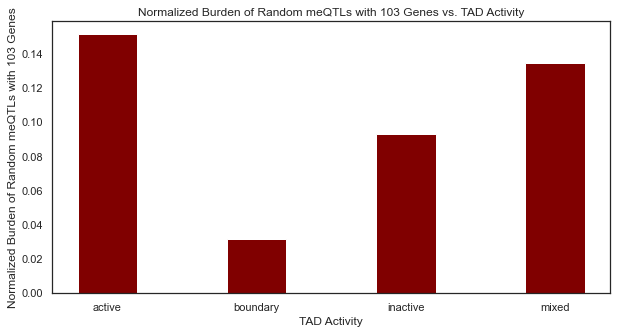

In [99]:
data1_rand_onco = {'active': active_mean_num_onco, 'boundary': boundary_mean_num_onco, 'inactive': inactive_mean_num_onco, 'mixed':mixed_mean_num_onco}
num_meqtls1_rand_onco = list(data1_rand_onco.keys())
values1_rand_onco = list(data1_rand_onco.values())
  
fig1_rand_onco = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(num_meqtls1_rand_onco, values1_rand_onco, color ='maroon',
        width = 0.4)

plt.xlabel("TAD Activity")
plt.ylabel("Normalized Burden of Random meQTLs with 103 Genes")
plt.title("Normalized Burden of Random meQTLs with 103 Genes vs. TAD Activity")
plt.show()

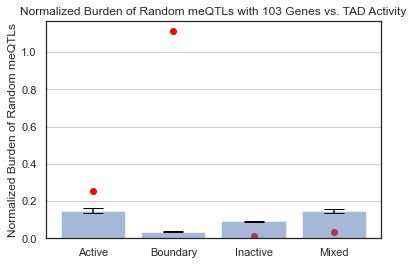

In [179]:
tad_activity1 = ['Active', 'Inter-TAD', 'Inactive', "Mixed"]
x_pos1 = np.arange(len(tad_activity1))
CTEs1 = [active_mean_num_onco, boundary_mean_num_onco, inactive_mean_num_onco, mixed_mean_num_onco]
error1 = [active_std_onco/np.sqrt(1000), boundary_std_onco/np.sqrt(1000), inactive_std_onco/np.sqrt(1000), mixed_std_onco/np.sqrt(1000)]
fig1, ax1 = plt.subplots()
ax1.bar(x_pos1, CTEs1, yerr=error1, align='center', alpha=0.5, ecolor='black', capsize=10)
ax1.set_ylabel('Normalized Burden of Random meQTLs')
ax1.set_xticks(x_pos1)
ax1.set_xticklabels(tad_activity1)
ax1.set_title('Normalized Burden of Random meQTLs with 103 Genes vs. TAD Activity')
ax1.yaxis.grid(True)
ax1.scatter(x_pos1[0], onco_active_num_snps/num_active, color = "red")
ax1.scatter(x_pos1[1], onco_boundary_num_snps/num_boundary, color = "red")
ax1.scatter(x_pos1[2], onco_inactive_num_snps/num_inactive, color = "red")
ax1.scatter(x_pos1[3], onco_mixed_num_snps/num_mixed, color = "red")
plt.show()

In [167]:
print(x_pos1)

[0 1 2 3]


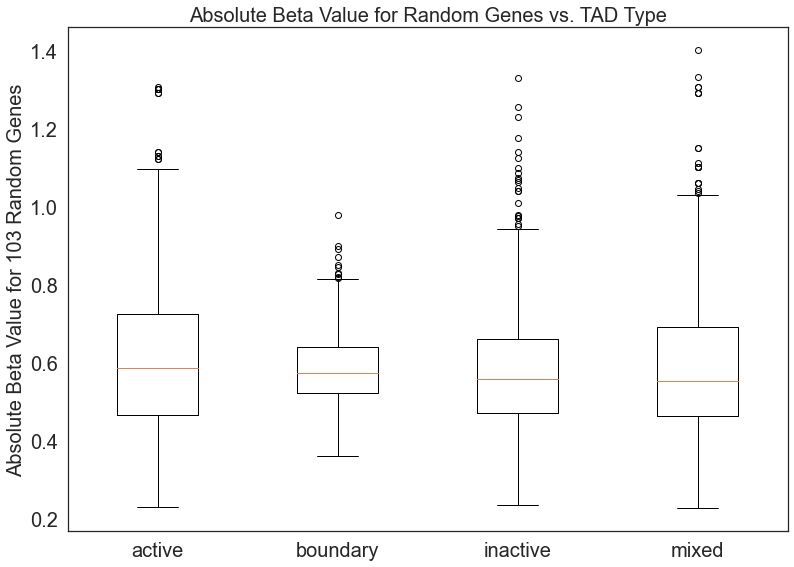

In [72]:
data3_rand_onco = [active_mean_beta_onco, boundary_mean_beta_onco, inactive_mean_beta_onco, mixed_mean_beta_onco]
fig3_rand_onco = plt.figure(figsize =(10, 7))
ax3_rand_onco = fig3_rand_onco.add_axes([0, 0, 1, 1])
boxplt3_rand_onco = ax3_rand_onco.boxplot(data3_rand_onco)
plt.ylabel("Absolute Beta Value for 103 Random Genes", fontsize=20)
plt.title("Absolute Beta Value for Random Genes vs. TAD Type", fontsize=20)
ax3_rand_onco.set_xticklabels(["active", "boundary", "inactive", "mixed"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [64]:
active_mean_beta_tsg = []
inactive_mean_beta_tsg = []
mixed_mean_beta_tsg = []
boundary_mean_beta_tsg = []
active_num_tsg = []
inactive_num_tsg = []
mixed_num_tsg = []
boundary_num_tsg = []
set_genes = set(random_genes_promoters["gene_symbol"])
for j in range(1000):
    if j % 100 == 0:
        print(j)
    rand_meqtls_tad_activity = {"Mixed":[], "Inactive":[], "Active":[], "Boundary":[]}
    rand_beta_tad_activity = {"Mixed":[], "Inactive":[], "Active":[], "Boundary":[]}
    random_sample_genes = random.sample(set_genes, 223)
    random_sample_df = random_genes_promoters[random_genes_promoters.gene_symbol.isin(random_sample_genes)]
    active_num_snps = 0
    inactive_num_snps = 0
    mixed_num_snps = 0
    boundary_num_snps = 0
    for i, row in random_sample_df.iterrows():
        common_chr_rand = meqtls[meqtls["probe_chr"] == row["chr"]]
        overlap_rand = common_chr_rand[(common_chr_rand["probe_bp"] >= row["promoter_start"]) & (common_chr_rand["probe_bp"] <= row["promoter_end"])]
        active_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Active"]
        inactive_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Inactive"]
        mixed_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Mixed"]
        boundary_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Boundary"]
        if len(overlap_rand[overlap_rand["TAD Type"] == "Active"])>0:
            rand_beta_tad_activity["Active"] += list(overlap_rand[overlap_rand["TAD Type"] == "Active"]["beta"])
        if len(overlap_rand[overlap_rand["TAD Type"] == "Inactive"])>0:
            rand_beta_tad_activity["Inactive"] += list(overlap_rand[overlap_rand["TAD Type"] == "Inactive"]["beta"])
        if len(overlap_rand[overlap_rand["TAD Type"] == "Mixed"])>0:
            rand_beta_tad_activity["Mixed"] += list(overlap_rand[overlap_rand["TAD Type"] == "Mixed"]["beta"])
        if len(overlap_rand[overlap_rand["TAD Type"] == "Boundary"])>0:
            rand_beta_tad_activity["Boundary"] += list(overlap_rand[overlap_rand["TAD Type"] == "Boundary"]["beta"])
            
    active_mean_beta_tsg.append(np.mean(np.absolute(np.array(rand_beta_tad_activity["Active"]))))
    inactive_mean_beta_tsg.append(np.mean(np.absolute(np.array(rand_beta_tad_activity["Inactive"]))))
    mixed_mean_beta_tsg.append(np.mean(np.absolute(np.array(rand_beta_tad_activity["Mixed"]))))
    boundary_mean_beta_tsg.append(np.mean(np.absolute(np.array(rand_beta_tad_activity["Boundary"]))))
    
    active_num_tsg.append(active_num_snps)
    inactive_num_tsg.append(inactive_num_snps)
    mixed_num_tsg.append(mixed_num_snps)
    boundary_num_tsg.append(mixed_num_snps)
    
active_mean_num_tsg = np.mean(active_num_tsg)
inactive_mean_num_tsg = np.mean(inactive_num_tsg)
mixed_mean_num_tsg = np.mean(mixed_num_tsg)
boundary_mean_num_tsg = np.mean(boundary_num_tsg)

0
100
200
300
400
500
600
700
800
900


In [109]:
active_mean_num_tsg = np.mean(np.array(active_num_tsg))
inactive_mean_num_tsg = np.mean(np.array(inactive_num_tsg))
mixed_mean_num_tsg = np.mean(np.array(mixed_num_tsg))
boundary_mean_num_tsg = np.mean(np.array(boundary_num_tsg))

In [160]:
active_mean_num_tsg

0.3271621621621622

In [105]:
active_num_tsg = np.array(active_num_tsg)/num_active
inactive_num_tsg = np.array(inactive_num_tsg)/num_inactive
mixed_num_tsg = np.array(mixed_num_tsg)/num_mixed
boundary_num_tsg = np.array(boundary_num_tsg)/num_boundary
active_std_tsg = np.std(active_num_tsg)
inactive_std_tsg = np.std(inactive_num_tsg)
mixed_std_tsg = np.std(mixed_num_tsg)
boundary_std_tsg = np.std(boundary_num_tsg)

In [161]:
print(num_active, num_boundary, num_inactive, num_mixed)

222 1077 626 252


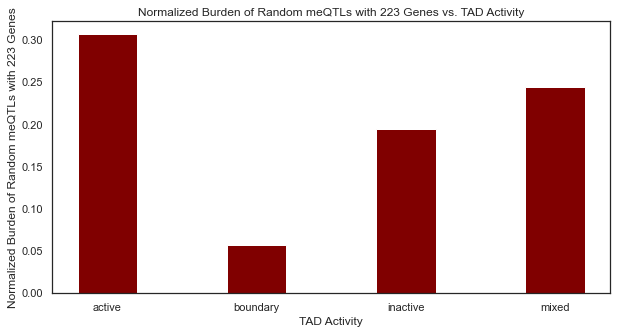

In [57]:
data1_rand_tsg = {'active':active_mean_num_tsg/num_active, 'boundary': boundary_mean_num_tsg/num_boundary, 'inactive':inactive_mean_num_tsg/num_inactive, 'mixed':mixed_mean_num_tsg/num_mixed}
num_meqtls1_rand_tsg = list(data1_rand_tsg.keys())
values1_rand_tsg = list(data1_rand_tsg.values())

fig1_rand_tsg = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(num_meqtls1_rand_tsg, values1_rand_tsg, color ='maroon',
        width = 0.4)
 
plt.xlabel("TAD Activity")
plt.ylabel("Normalized Burden of Random meQTLs with 223 Genes")
plt.title("Normalized Burden of Random meQTLs with 223 Genes vs. TAD Activity")
plt.show()

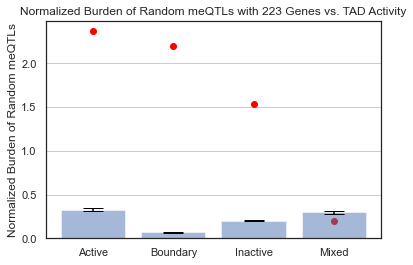

In [182]:
tad_activity2 = ['Active', 'Boundary', 'Inactive', "Mixed"]
x_pos2 = np.arange(len(tad_activity2))
CTEs2 = [active_mean_num_tsg, boundary_mean_num_tsg, inactive_mean_num_tsg, mixed_mean_num_tsg]
error2 = [active_std_tsg/np.sqrt(1000), boundary_std_tsg/np.sqrt(1000), inactive_std_tsg/np.sqrt(1000), mixed_std_tsg/np.sqrt(1000)]
fig2, ax2 = plt.subplots()
ax2.bar(x_pos2, CTEs2, yerr=error2, align='center', alpha=0.5, ecolor='black', capsize=10)
ax2.set_ylabel('Normalized Burden of Random meQTLs')
ax2.set_xticks(x_pos2)
ax2.set_xticklabels(tad_activity2)
ax2.set_title('Normalized Burden of Random meQTLs with 223 Genes vs. TAD Activity')
ax2.yaxis.grid(True)
ax2.scatter(x_pos2[0], tsg_active_num_snps/num_active, color = "red")
ax2.scatter(x_pos2[1], tsg_boundary_num_snps/num_boundary, color = "red")
ax2.scatter(x_pos2[2], tsg_inactive_num_snps/num_inactive, color = "red")
ax2.scatter(x_pos2[3], tsg_mixed_num_snps/num_mixed, color = "red")
plt.show()

In [67]:
active_mean_beta_tsg = np.array(active_mean_beta_tsg)
inactive_mean_beta_tsg = np.array(inactive_mean_beta_tsg)
mixed_mean_beta_tsg = np.array(mixed_mean_beta_tsg)
boundary_mean_beta_tsg = np.array(boundary_mean_beta_tsg)
active_mean_beta_tsg = active_mean_beta_tsg[~np.isnan(active_mean_beta_tsg)]
inactive_mean_beta_tsg = inactive_mean_beta_tsg[~np.isnan(inactive_mean_beta_tsg)]
mixed_mean_beta_tsg = mixed_mean_beta_tsg[~np.isnan(mixed_mean_beta_tsg)]
boundary_mean_beta_tsg = boundary_mean_beta_onco[~np.isnan(boundary_mean_beta_tsg)]

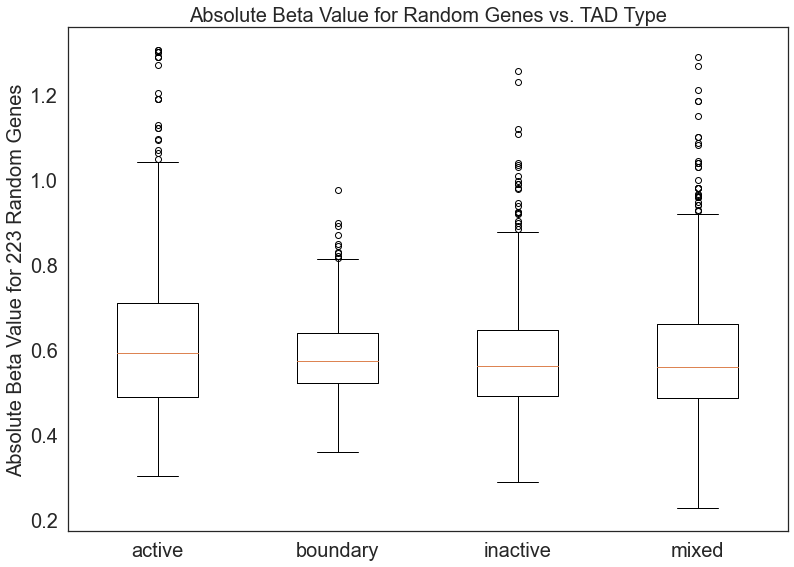

In [73]:
data3_rand_tsg = [active_mean_beta_tsg, boundary_mean_beta_tsg, inactive_mean_beta_tsg, mixed_mean_beta_tsg]
fig3_rand_tsg = plt.figure(figsize =(10, 7))
ax3_rand_tsg = fig3_rand_tsg.add_axes([0, 0, 1, 1])
boxplt3_rand_tsg = ax3_rand_tsg.boxplot(data3_rand_tsg)
plt.ylabel("Absolute Beta Value for 223 Random Genes", fontsize=20)
plt.title("Absolute Beta Value for Random Genes vs. TAD Type", fontsize=20)
ax3_rand_tsg.set_xticklabels(["active", "boundary", "inactive", "mixed"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [79]:
meQTL_driver_gene_promoter = pd.DataFrame()
snp_chr = []
snp_bp = []
probe_chr = []
probe_bp = []
oncogenes = []
tsgs = []
TAD_status = []

for i, row in meqtls.iterrows():
    if i % 100000 == 0:
        print(i)
    common_chr_onco = oncogenes_promoters[oncogenes_promoters["chr"] == row["probe_chr"]]
    overlap_onco = common_chr_onco[(row["probe_bp"] >= common_chr_onco["start"]) & (row["probe_bp"] <= common_chr_onco["end"])]
    oncogenes.append(len(overlap_onco))
    
    common_chr_tsg = tsg_promoters[tsg_promoters["chr"] == row["probe_chr"]]
    overlap_tsg= common_chr_tsg[(row["probe_bp"] >= common_chr_tsg["start"]) & (row["probe_bp"] <= common_chr_tsg["end"])]
    tsgs.append(len(overlap_tsg))
    
    snp_chr.append(row["chr"])
    snp_bp.append(row["bp"])
    probe_chr.append(row["probe_chr"])
    probe_bp.append(row["probe_bp"])
    TAD_status.append(row["TAD Type"])

meQTL_driver_gene_promoter["snp_chr"] = snp_chr
meQTL_driver_gene_promoter["snp_bp"] = snp_bp
meQTL_driver_gene_promoter["probe_chr"] = probe_chr
meQTL_driver_gene_promoter["probe_bp"] = probe_bp
meQTL_driver_gene_promoter["oncogenes"] = oncogenes
meQTL_driver_gene_promoter["TSGs"] = tsgs



0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000


In [174]:
oncogenes_promoters

,Unnamed: 0,chr,start,end,id,4,strand
0,0,chr1,244006886,244007886,NM_001206729.2_up_1000_chr1_244006887_r,0,-
1,1,chr1,162600764,162601764,NM_001354982.2_up_1000_chr1_162600765_f,0,+
2,2,chr1,162599652,162600652,NM_001354983.2_up_1000_chr1_162599653_f,0,+
3,3,chr1,150897738,150898738,NM_001366417.1_up_1000_chr1_150897739_f,0,+
4,4,chr1,244014381,244015381,NM_001370074.1_up_1000_chr1_244014382_r,0,-
...,...,...,...,...,...,...,...
167,167,chr21,44527680,44528680,NM_006758.3_up_1000_chr21_44527681_r,0,-
168,168,chr21,44527688,44528688,NM_001025203.1_up_1000_chr21_44527689_r,0,-
169,169,chr22,22221935,22222935,NM_002745.5_up_1000_chr22_22221936_r,0,-
170,170,chr22,20066763,20067763,NM_022720.7_up_1000_chr22_20066764_f,0,+


In [175]:
#oncogenes
onco_active_num_snps=0
onco_inactive_num_snps=0
onco_mixed_num_snps=0
onco_boundary_num_snps=0
onco_beta_tad_activity = {"Mixed":[], "Inactive":[], "Active":[], "Boundary":[]}
for i, row in oncogenes_promoters.iterrows():
        if i%10==0:
            print(i)
        common_chr_rand = meqtls[meqtls["probe_chr"] == row["chr"]]
        overlap_rand = common_chr_rand[(common_chr_rand["probe_bp"] >= row["start"]) & (common_chr_rand["probe_bp"] <= row["end"])]
        onco_active_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Active"]
        onco_inactive_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Inactive"]
        onco_mixed_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Mixed"]
        onco_boundary_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Boundary"]
        if len(overlap_rand[overlap_rand["TAD Type"] == "Active"])>0:
            onco_beta_tad_activity["Active"] += list(overlap_rand[overlap_rand["TAD Type"] == "Active"]["beta"])
        if len(overlap_rand[overlap_rand["TAD Type"] == "Inactive"])>0:
            onco_beta_tad_activity["Inactive"] += list(overlap_rand[overlap_rand["TAD Type"] == "Inactive"]["beta"])
        if len(overlap_rand[overlap_rand["TAD Type"] == "Mixed"])>0:
            onco_beta_tad_activity["Mixed"] += list(overlap_rand[overlap_rand["TAD Type"] == "Mixed"]["beta"])
        if len(overlap_rand[overlap_rand["TAD Type"] == "Boundary"])>0:
            onco_beta_tad_activity["Boundary"] += list(overlap_rand[overlap_rand["TAD Type"] == "Boundary"]["beta"])

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170


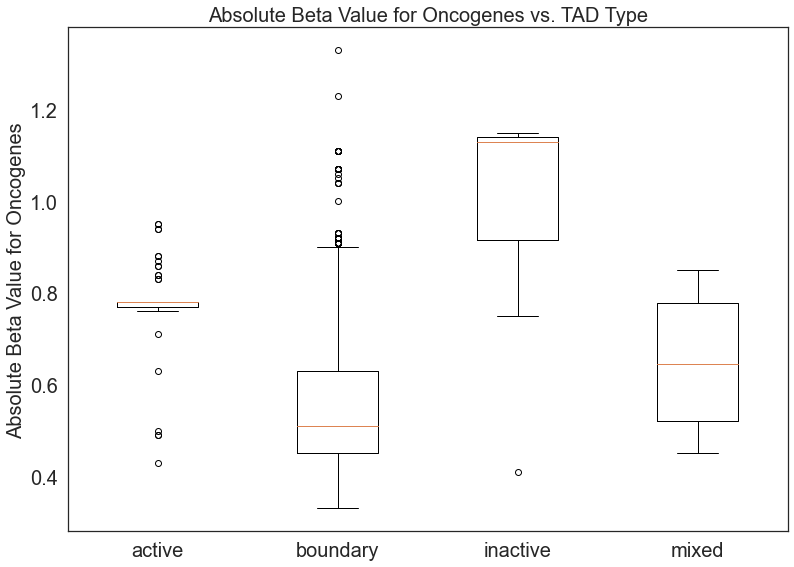

In [185]:
data3_2 = [np.absolute(onco_beta_tad_activity["Active"]), np.absolute(onco_beta_tad_activity["Boundary"]), np.absolute(onco_beta_tad_activity["Inactive"]), np.absolute(onco_beta_tad_activity["Mixed"])]
fig3_2 = plt.figure(figsize =(10, 7))
ax3_2 = fig3_2.add_axes([0, 0, 1, 1])
boxplt3_2 = ax3_2.boxplot(data3_2)
plt.ylabel("Absolute Beta Value for Oncogenes", fontsize=20)
plt.title("Absolute Beta Value for Oncogenes vs. TAD Type", fontsize=20)
ax3_2.set_xticklabels(["active", "boundary", "inactive", "mixed"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [180]:
tsg_promoters

,Unnamed: 0,chr,start,end,id,4,strand
0,0,chr1,241683055,241684055,NM_000143.4_up_1000_chr1_241683056_r,0,-
1,1,chr1,116914865,116915865,NM_000701.8_up_1000_chr1_116914866_f,0,+
2,2,chr1,93296596,93297596,NM_000969.5_up_1000_chr1_93296597_f,0,+
3,3,chr1,14074909,14075909,NM_001007257.3_up_1000_chr1_14074910_f,0,+
4,4,chr1,14025682,14026682,NM_001135610.2_up_1000_chr1_14025683_f,0,+
...,...,...,...,...,...,...,...
364,364,chr22,29998544,29999544,NM_016418.5_up_1000_chr22_29998545_f,0,+
365,365,chr22,29998621,29999621,NR_156186.2_up_1000_chr22_29998622_f,0,+
366,366,chr22,21335585,21336585,NM_006767.4_up_1000_chr22_21335586_f,0,+
367,367,chr22,24128152,24129152,NM_001362877.2_up_1000_chr22_24128153_f,0,+


In [181]:
#tsgs
tsg_active_num_snps=0
tsg_inactive_num_snps=0
tsg_mixed_num_snps=0
tsg_boundary_num_snps=0
tsg_beta_tad_activity = {"Mixed":[], "Inactive":[], "Active":[], "Boundary":[]}
for i, row in tsg_promoters.iterrows():
        if i%10==0:
            print(i)
        common_chr_rand = meqtls[meqtls["probe_chr"] == row["chr"]]
        overlap_rand = common_chr_rand[(common_chr_rand["probe_bp"] >= row["start"]) & (common_chr_rand["probe_bp"] <= row["end"])]
        tsg_active_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Active"]
        tsg_inactive_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Inactive"]
        tsg_mixed_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Mixed"]
        tsg_boundary_num_snps+=overlap_rand["Categorical TAD Type"].value_counts()["Boundary"]
        if len(overlap_rand[overlap_rand["TAD Type"] == "Active"])>0:
            tsg_beta_tad_activity["Active"] += list(overlap_rand[overlap_rand["TAD Type"] == "Active"]["beta"])
        if len(overlap_rand[overlap_rand["TAD Type"] == "Inactive"])>0:
            tsg_beta_tad_activity["Inactive"] += list(overlap_rand[overlap_rand["TAD Type"] == "Inactive"]["beta"])
        if len(overlap_rand[overlap_rand["TAD Type"] == "Mixed"])>0:
            tsg_beta_tad_activity["Mixed"] += list(overlap_rand[overlap_rand["TAD Type"] == "Mixed"]["beta"])
        if len(overlap_rand[overlap_rand["TAD Type"] == "Boundary"])>0:
            tsg_beta_tad_activity["Boundary"] += list(overlap_rand[overlap_rand["TAD Type"] == "Boundary"]["beta"])

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


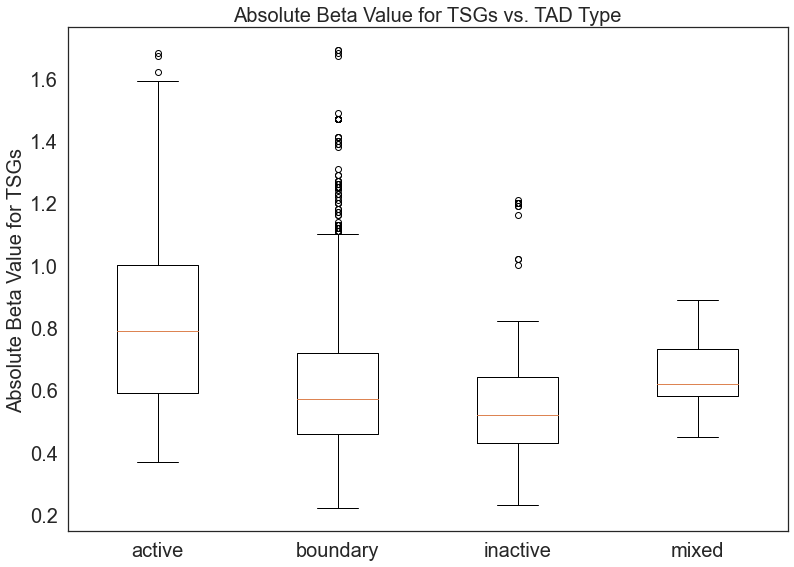

In [187]:
data3_3 = [np.absolute(tsg_beta_tad_activity["Active"]), np.absolute(tsg_beta_tad_activity["Boundary"]), np.absolute(tsg_beta_tad_activity["Inactive"]), np.absolute(tsg_beta_tad_activity["Mixed"])]
fig3_3 = plt.figure(figsize =(10, 7))
ax3_3 = fig3_3.add_axes([0, 0, 1, 1])
boxplt3_3 = ax3_3.boxplot(data3_3)
plt.ylabel("Absolute Beta Value for TSGs", fontsize=20)
plt.title("Absolute Beta Value for TSGs vs. TAD Type", fontsize=20)
ax3_3.set_xticklabels(["active", "boundary", "inactive", "mixed"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [80]:
meQTL_driver_gene_promoter["TAD Type"] = TADs
meQTL_driver_gene_promoter

,snp_chr,snp_bp,probe_chr,probe_bp,oncogenes,TSGs,TAD Type
0,chr2,33952621,chr2,33951647,0,0,Neither
1,chr2,33954560,chr2,33951647,0,0,Neither
2,chr2,33953186,chr2,33951647,0,0,Neither
3,chr8,91676709,chr8,91681699,0,0,Boundary
4,chr8,91677926,chr8,91681699,0,0,Boundary
...,...,...,...,...,...,...,...
1236137,chr3,124711371,chr3,124705145,0,0,Boundary
1236138,chr3,124711386,chr3,124705145,0,0,Boundary
1236139,chr10,2018353,chr10,1416569,0,0,Neither
1236140,chr10,2019373,chr10,1416569,0,0,Neither


In [81]:
meQTL_driver_gene_promoter["Beta Value"] = abs(meqtls["beta"])
meQTL_driver_gene_promoter

,snp_chr,snp_bp,probe_chr,probe_bp,oncogenes,TSGs,TAD Type,Beta Value
0,chr2,33952621,chr2,33951647,0,0,Neither,1.24
1,chr2,33954560,chr2,33951647,0,0,Neither,1.24
2,chr2,33953186,chr2,33951647,0,0,Neither,1.24
3,chr8,91676709,chr8,91681699,0,0,Boundary,1.20
4,chr8,91677926,chr8,91681699,0,0,Boundary,1.20
...,...,...,...,...,...,...,...,...
1236137,chr3,124711371,chr3,124705145,0,0,Boundary,0.43
1236138,chr3,124711386,chr3,124705145,0,0,Boundary,0.43
1236139,chr10,2018353,chr10,1416569,0,0,Neither,0.36
1236140,chr10,2019373,chr10,1416569,0,0,Neither,0.36


In [82]:
meQTL_driver_gene_promoter["Actual Beta Value"] = meqtls["beta"]
meQTL_driver_gene_promoter

,snp_chr,snp_bp,probe_chr,probe_bp,oncogenes,TSGs,TAD Type,Beta Value,Actual Beta Value
0,chr2,33952621,chr2,33951647,0,0,Neither,1.24,-1.24
1,chr2,33954560,chr2,33951647,0,0,Neither,1.24,-1.24
2,chr2,33953186,chr2,33951647,0,0,Neither,1.24,-1.24
3,chr8,91676709,chr8,91681699,0,0,Boundary,1.20,-1.20
4,chr8,91677926,chr8,91681699,0,0,Boundary,1.20,-1.20
...,...,...,...,...,...,...,...,...,...
1236137,chr3,124711371,chr3,124705145,0,0,Boundary,0.43,0.43
1236138,chr3,124711386,chr3,124705145,0,0,Boundary,0.43,0.43
1236139,chr10,2018353,chr10,1416569,0,0,Neither,0.36,0.36
1236140,chr10,2019373,chr10,1416569,0,0,Neither,0.36,0.36


In [40]:
print(len(meQTL_driver_gene_promoter[meQTL_driver_gene_promoter["oncogenes"] != 0]))
print(len(meQTL_driver_gene_promoter[meQTL_driver_gene_promoter["TSGs"] != 0]))

1047
3187


In [41]:
pd.unique(meQTL_driver_gene_promoter["TSGs"])

array([0, 1, 2, 3], dtype=int64)

In [83]:
active_meqtls_onco = meQTL_driver_gene_promoter[(meQTL_driver_gene_promoter["TAD Type"] == "Active") & (meQTL_driver_gene_promoter["oncogenes"] != 0)]
inactive_meqtls_onco = meQTL_driver_gene_promoter[(meQTL_driver_gene_promoter["TAD Type"] == "Inactive") & (meQTL_driver_gene_promoter["oncogenes"] != 0)]
mixed_meqtls_onco = meQTL_driver_gene_promoter[(meQTL_driver_gene_promoter["TAD Type"] == "Mixed") & (meQTL_driver_gene_promoter["oncogenes"] != 0)]
boundary_meqtls_onco = meQTL_driver_gene_promoter[(meQTL_driver_gene_promoter["TAD Type"] == "Boundary") & (meQTL_driver_gene_promoter["oncogenes"] != 0)]

In [43]:
print(len(active_meqtls_onco))
print(len(boundary_meqtls_onco))
print(len(inactive_meqtls_onco))
print(len(mixed_meqtls_onco))

49
947
5
8


In [84]:
num_active = len(common_TADs[(common_TADs["KMeans_State_Labels"] == 2) | (common_TADs["KMeans_State_Labels"] == 3)])
num_inactive = len(common_TADs[(common_TADs["KMeans_State_Labels"] == 1) | (common_TADs["KMeans_State_Labels"] == 4)])
num_mixed = len(common_TADs[(common_TADs["KMeans_State_Labels"] == 0)])
num_boundary = 1077

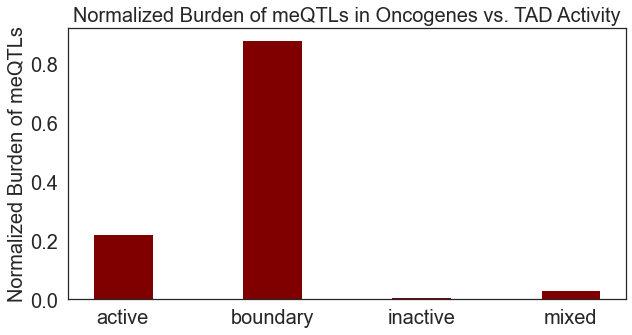

In [118]:
data1 = {'active':len(active_meqtls_onco)/num_active, 'boundary': len(boundary_meqtls_onco)/num_boundary, 'inactive':len(inactive_meqtls_onco)/num_inactive, 'mixed':len(mixed_meqtls_onco)/num_mixed}
num_meqtls1 = list(data1.keys())
values1 = list(data1.values())
  
fig1 = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(num_meqtls1, values1, color ='maroon',
        width = 0.4)
 
plt.xticks(fontsize=20)
plt.ylabel("Normalized Burden of meQTLs", fontsize=20)
plt.title("Normalized Burden of meQTLs in Oncogenes vs. TAD Activity", fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [90]:
stats.kruskal(active_meqtls_onco["Beta Value"], boundary_meqtls_onco["Beta Value"], inactive_meqtls_onco["Beta Value"], mixed_meqtls_onco["Beta Value"])

KruskalResult(statistic=63.7758253226414, pvalue=9.166001429242129e-14)

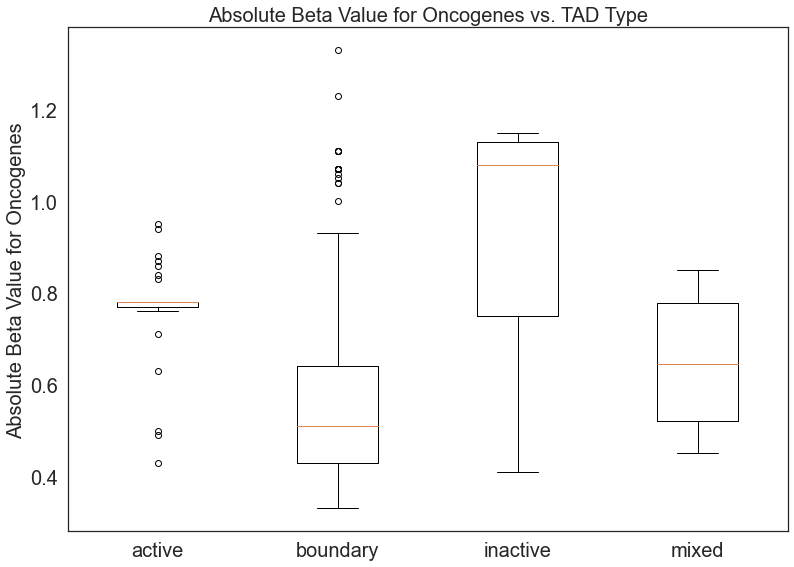

In [116]:
data3 = [active_meqtls_onco["Beta Value"], boundary_meqtls_onco["Beta Value"], inactive_meqtls_onco["Beta Value"], mixed_meqtls_onco["Beta Value"]]
fig3 = plt.figure(figsize =(10, 7))
ax3 = fig3.add_axes([0, 0, 1, 1])
boxplt3 = ax3.boxplot(data3)
plt.ylabel("Absolute Beta Value for Oncogenes", fontsize=20)
plt.title("Absolute Beta Value for Oncogenes vs. TAD Type", fontsize=20)
ax3.set_xticklabels(["active", "boundary", "inactive", "mixed"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

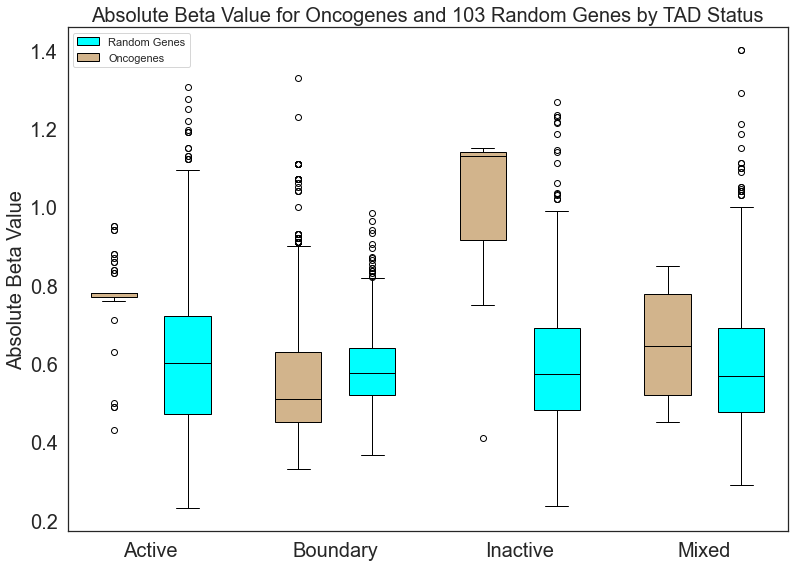

In [192]:
all_rand_onco = []
fig_onco = plt.figure(figsize =(10, 7))
ax_onco = fig_onco.add_axes([0, 0, 1, 1])
all_rand_onco.append(active_mean_beta_onco)
all_rand_onco.append(boundary_mean_beta_onco)
all_rand_onco.append(inactive_mean_beta_onco)
all_rand_onco.append(mixed_mean_beta_onco)
left_positions_onco = [-0.4,  1.6,  3.6, 5.6]
all_onco = []
#[np.absolute(onco_beta_tad_activity["Active"]), np.absolute(onco_beta_tad_activity["Boundary"]), np.absolute(onco_beta_tad_activity["Inactive"]), np.absolute(onco_beta_tad_activity["Mixed"])]
all_onco.append(np.absolute(onco_beta_tad_activity["Active"]))
all_onco.append(np.absolute(onco_beta_tad_activity["Boundary"]))
all_onco.append(np.absolute(onco_beta_tad_activity["Inactive"]))
all_onco.append(np.absolute(onco_beta_tad_activity["Mixed"]))
right_positions_onco = [0.4, 2.4, 4.4, 6.4]
c = "cyan"
bp1_onco = ax_onco.boxplot(all_rand_onco, positions = right_positions_onco, patch_artist=True, boxprops=dict(facecolor=c, color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(color=c, markeredgecolor="black"),
            medianprops=dict(color="black"))
c2 = "tan"
bp2_onco = ax_onco.boxplot(all_onco, positions = left_positions_onco, patch_artist=True, boxprops=dict(facecolor=c2, color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(color=c2, markeredgecolor="black"),
            medianprops=dict(color="black"))
ticks_onco = [0, 2, 4, 6]
labels_onco = ["Active", "Boundary", "Inactive", "Mixed"]
plt.xticks(ticks_onco, labels_onco, fontsize=20)
plt.yticks(fontsize=20)
plt.title("Absolute Beta Value for Oncogenes and 103 Random Genes by TAD Status", fontsize=20)
plt.ylabel("Absolute Beta Value", fontsize=20)
ax_onco.legend([bp1_onco["boxes"][0], bp2_onco["boxes"][0]], ['Random Genes', 'Oncogenes'])
plt.show()




In [194]:
print(stats.ttest_ind(active_mean_beta_onco, np.absolute(onco_beta_tad_activity["Active"]), equal_var=False))
print(stats.ttest_ind(boundary_mean_beta_onco, np.absolute(onco_beta_tad_activity["Boundary"]), equal_var=False))
print(stats.ttest_ind(np.absolute(onco_beta_tad_activity["Inactive"]), inactive_mean_beta_onco, equal_var=False))
print(stats.ttest_ind(mixed_mean_beta_onco, np.absolute(onco_beta_tad_activity["Mixed"]), equal_var=False))

Ttest_indResult(statistic=-9.555149238398918, pvalue=1.0097584713670777e-15)
Ttest_indResult(statistic=3.986097319643275, pvalue=6.968506097433696e-05)
Ttest_indResult(statistic=3.4501802318035995, pvalue=0.013524260143604515)
Ttest_indResult(statistic=-0.9403629886488292, pvalue=0.3772926088927201)


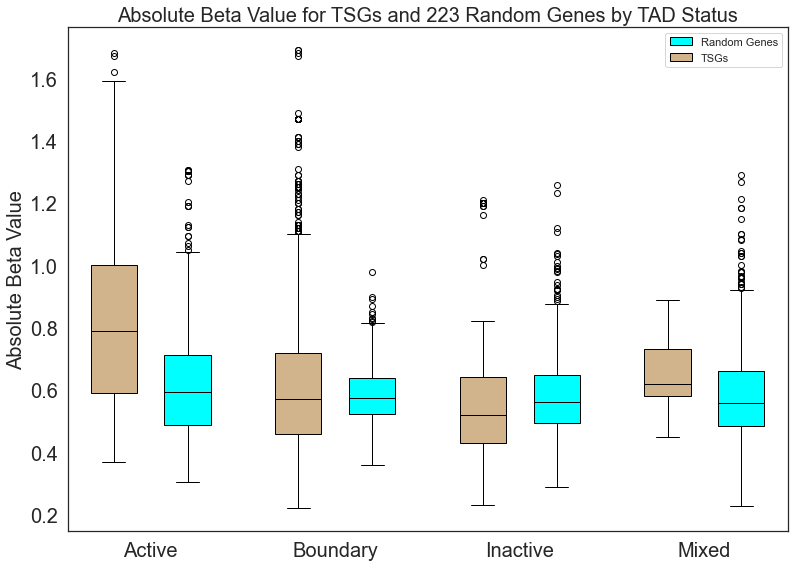

In [193]:
all_rand_tsg = []
fig_tsg = plt.figure(figsize =(10, 7))
ax_tsg = fig_tsg.add_axes([0, 0, 1, 1])
all_rand_tsg.append(active_mean_beta_tsg)
all_rand_tsg.append(boundary_mean_beta_tsg)
all_rand_tsg.append(inactive_mean_beta_tsg)
all_rand_tsg.append(mixed_mean_beta_tsg)
left_positions_tsg = [-0.4,  1.6,  3.6, 5.6]
all_tsg = []
#[np.absolute(tsg_beta_tad_activity["Active"]), np.absolute(tsg_beta_tad_activity["Boundary"]), np.absolute(tsg_beta_tad_activity["Inactive"]), np.absolute(tsg_beta_tad_activity["Mixed"])]
all_tsg.append(np.absolute(tsg_beta_tad_activity["Active"]))
all_tsg.append(np.absolute(tsg_beta_tad_activity["Boundary"]))
all_tsg.append(np.absolute(tsg_beta_tad_activity["Inactive"]))
all_tsg.append(np.absolute(tsg_beta_tad_activity["Mixed"]))
right_positions_tsg = [0.4, 2.4, 4.4, 6.4]
bp1_tsg = ax_tsg.boxplot(all_rand_tsg, positions = right_positions_tsg, patch_artist=True, boxprops=dict(facecolor=c, color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(color=c, markeredgecolor="black"),
            medianprops=dict(color="black"))
bp2_tsg = ax_tsg.boxplot(all_tsg, positions = left_positions_tsg, patch_artist=True, boxprops=dict(facecolor=c2, color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(color=c2, markeredgecolor="black"),
            medianprops=dict(color="black"))
ticks_tsg = [0, 2, 4, 6]
labels_tsg = ["Active", "Boundary", "Inactive", "Mixed"]
plt.xticks(ticks_tsg, labels_tsg, fontsize=20)
plt.yticks(fontsize=20)
plt.title("Absolute Beta Value for TSGs and 223 Random Genes by TAD Status", fontsize=20)
plt.ylabel("Absolute Beta Value", fontsize=20)
ax_tsg.legend([bp1_tsg["boxes"][0], bp2_tsg["boxes"][0]], ['Random Genes', 'TSGs'])
plt.show()

In [195]:
print(stats.ttest_ind(active_mean_beta_tsg, np.absolute(tsg_beta_tad_activity["Active"]), equal_var=False))
print(stats.ttest_ind(boundary_mean_beta_tsg, np.absolute(tsg_beta_tad_activity["Boundary"]), equal_var=False))
print(stats.ttest_ind(np.absolute(tsg_beta_tad_activity["Inactive"]), inactive_mean_beta_tsg, equal_var=False))
print(stats.ttest_ind(mixed_mean_beta_tsg, np.absolute(tsg_beta_tad_activity["Mixed"]), equal_var=False))

Ttest_indResult(statistic=-14.22119190530414, pvalue=6.701498906152775e-41)
Ttest_indResult(statistic=-7.946094676691669, pvalue=2.6046937130251233e-15)
Ttest_indResult(statistic=-3.7776985981426843, pvalue=0.00016334622740414906)
Ttest_indResult(statistic=-3.842425072984962, pvalue=0.00030397199413739593)


In [27]:
active_meqtls_onco_pos = active_meqtls_onco[active_meqtls_onco["Actual Beta Value"] > 0]
inactive_meqtls_onco_pos = inactive_meqtls_onco[inactive_meqtls_onco["Actual Beta Value"] > 0]
mixed_meqtls_onco_pos = mixed_meqtls_onco[mixed_meqtls_onco["Actual Beta Value"] > 0]
boundary_meqtls_onco_pos = boundary_meqtls_onco[boundary_meqtls_onco["Actual Beta Value"] > 0]

active_meqtls_onco_neg = active_meqtls_onco[active_meqtls_onco["Actual Beta Value"] < 0]
inactive_meqtls_onco_neg = inactive_meqtls_onco[inactive_meqtls_onco["Actual Beta Value"] < 0]
mixed_meqtls_onco_neg = mixed_meqtls_onco[mixed_meqtls_onco["Actual Beta Value"] < 0]
boundary_meqtls_onco_neg = boundary_meqtls_onco[boundary_meqtls_onco["Actual Beta Value"] < 0]

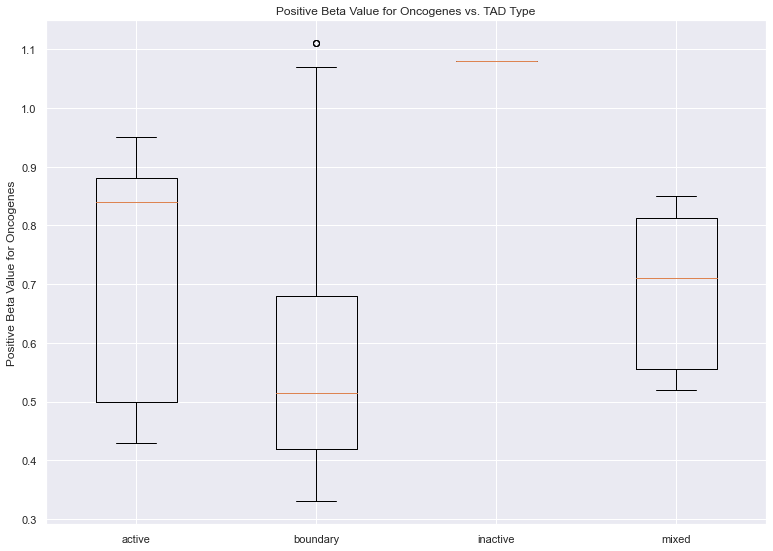

In [48]:
#positive onco beta value
data5 = [active_meqtls_onco_pos["Actual Beta Value"], boundary_meqtls_onco_pos["Actual Beta Value"], inactive_meqtls_onco_pos["Actual Beta Value"], mixed_meqtls_onco_pos["Actual Beta Value"]]
fig5 = plt.figure(figsize =(10, 7))
ax5 = fig5.add_axes([0, 0, 1, 1])
boxplt5 = ax5.boxplot(data5)
plt.ylabel("Positive Beta Value for Oncogenes")
plt.title("Positive Beta Value for Oncogenes vs. TAD Type")
ax5.set_xticklabels(["active", "boundary", "inactive", "mixed"])
plt.show()

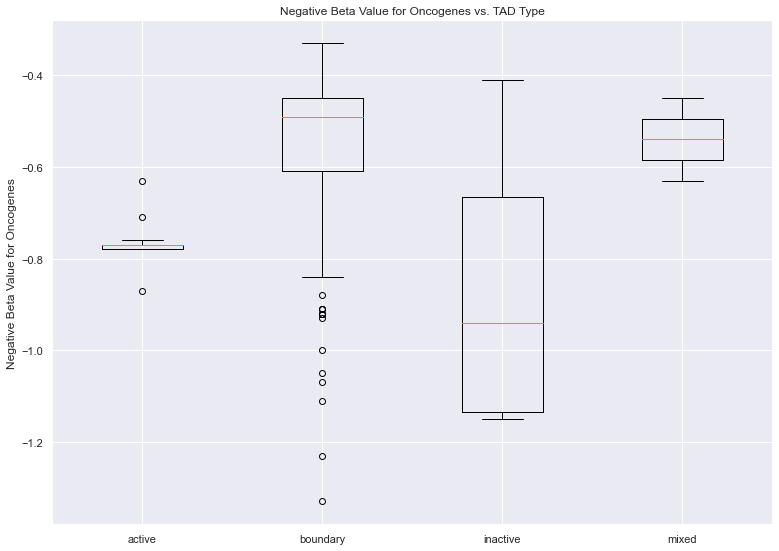

In [49]:
#negative onco beta value
data6 = [active_meqtls_onco_neg["Actual Beta Value"], boundary_meqtls_onco_neg["Actual Beta Value"], inactive_meqtls_onco_neg["Actual Beta Value"], mixed_meqtls_onco_neg["Actual Beta Value"]]
fig6 = plt.figure(figsize =(10, 7))
ax6 = fig6.add_axes([0, 0, 1, 1])
boxplt6 = ax6.boxplot(data6)
plt.ylabel("Negative Beta Value for Oncogenes")
plt.title("Negative Beta Value for Oncogenes vs. TAD Type")
ax6.set_xticklabels(["active", "boundary", "inactive", "mixed"])
plt.show()

In [87]:
active_meqtls_tsg = meQTL_driver_gene_promoter[(meQTL_driver_gene_promoter["TAD Type"] == "Active") & (meQTL_driver_gene_promoter["TSGs"] != 0)]
inactive_meqtls_tsg = meQTL_driver_gene_promoter[(meQTL_driver_gene_promoter["TAD Type"] == "Inactive") & (meQTL_driver_gene_promoter["TSGs"] != 0)]
mixed_meqtls_tsg = meQTL_driver_gene_promoter[(meQTL_driver_gene_promoter["TAD Type"] == "Mixed") & (meQTL_driver_gene_promoter["TSGs"] != 0)]
boundary_meqtls_tsg = meQTL_driver_gene_promoter[(meQTL_driver_gene_promoter["TAD Type"] == "Boundary") & (meQTL_driver_gene_promoter["TSGs"] != 0)]

In [29]:
active_meqtls_tsg_pos = active_meqtls_tsg[active_meqtls_tsg["Actual Beta Value"] > 0]
inactive_meqtls_tsg_pos = inactive_meqtls_tsg[inactive_meqtls_tsg["Actual Beta Value"] > 0]
mixed_meqtls_tsg_pos = mixed_meqtls_tsg[mixed_meqtls_tsg["Actual Beta Value"] > 0]
boundary_meqtls_tsg_pos = boundary_meqtls_tsg[boundary_meqtls_tsg["Actual Beta Value"] > 0]

active_meqtls_tsg_neg = active_meqtls_tsg[active_meqtls_tsg["Actual Beta Value"] < 0]
inactive_meqtls_tsg_neg = inactive_meqtls_tsg[inactive_meqtls_tsg["Actual Beta Value"] < 0]
mixed_meqtls_tsg_neg = mixed_meqtls_tsg[mixed_meqtls_tsg["Actual Beta Value"] < 0]
boundary_meqtls_tsg_neg = boundary_meqtls_tsg[boundary_meqtls_tsg["Actual Beta Value"] < 0]

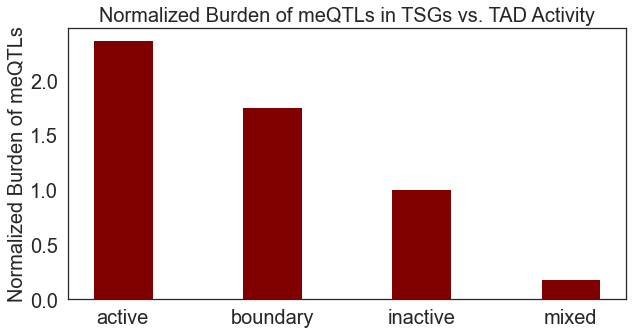

In [158]:
data2 = {'active':len(active_meqtls_tsg)/num_active, 'boundary': len(boundary_meqtls_tsg)/num_boundary, 'inactive':len(inactive_meqtls_tsg)/num_inactive, 'mixed':len(mixed_meqtls_tsg)/num_mixed}
num_meqtls2 = list(data2.keys())
values2 = list(data2.values())
  
fig2 = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(num_meqtls2, values2, color ='maroon',
        width = 0.4)
 
plt.xticks(fontsize=20)
plt.ylabel("Normalized Burden of meQTLs", fontsize=20)
plt.title("Normalized Burden of meQTLs in TSGs vs. TAD Activity", fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [91]:
stats.kruskal(active_meqtls_tsg["Beta Value"], boundary_meqtls_tsg["Beta Value"], inactive_meqtls_tsg["Beta Value"], mixed_meqtls_tsg["Beta Value"])

KruskalResult(statistic=304.3427798476153, pvalue=1.142474826348884e-65)

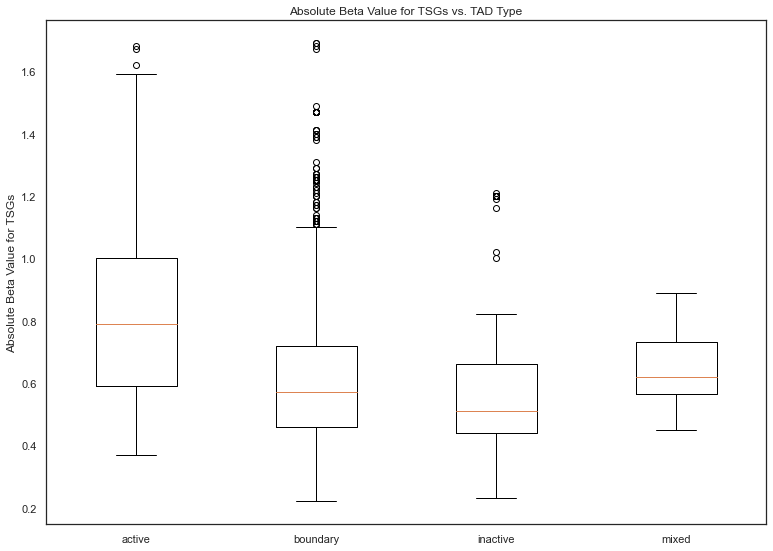

In [89]:
data4 = [active_meqtls_tsg["Beta Value"], boundary_meqtls_tsg["Beta Value"], inactive_meqtls_tsg["Beta Value"], mixed_meqtls_tsg["Beta Value"]]
fig4 = plt.figure(figsize =(10, 7))
ax4 = fig4.add_axes([0, 0, 1, 1])
boxplt4 = ax4.boxplot(data4)
plt.ylabel("Absolute Beta Value for TSGs")
plt.title("Absolute Beta Value for TSGs vs. TAD Type")
ax4.set_xticklabels(["active", "boundary", "inactive", "mixed"])
plt.show()

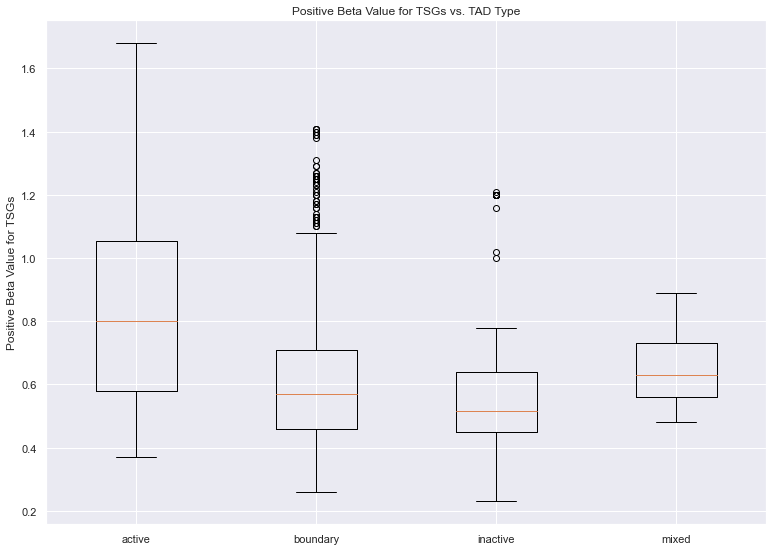

In [54]:
#positive tsg beta value
data7 = [active_meqtls_tsg_pos["Actual Beta Value"], boundary_meqtls_tsg_pos["Actual Beta Value"], inactive_meqtls_tsg_pos["Actual Beta Value"], mixed_meqtls_tsg_pos["Actual Beta Value"]]
fig7 = plt.figure(figsize =(10, 7))
ax7 = fig7.add_axes([0, 0, 1, 1])
boxplt7 = ax7.boxplot(data7)
plt.ylabel("Positive Beta Value for TSGs")
plt.title("Positive Beta Value for TSGs vs. TAD Type")
ax7.set_xticklabels(["active", "boundary", "inactive", "mixed"])
plt.show()

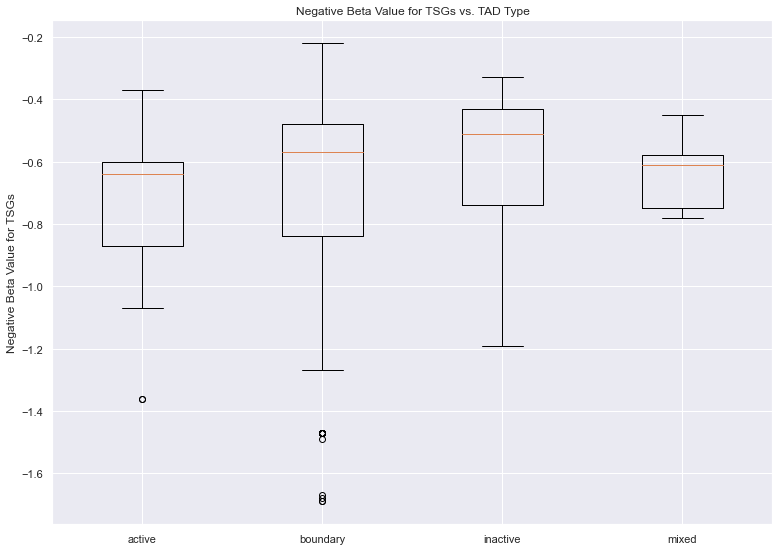

In [55]:
#negative tsg beta value
data8 = [active_meqtls_tsg_neg["Actual Beta Value"], boundary_meqtls_tsg_neg["Actual Beta Value"], inactive_meqtls_tsg_neg["Actual Beta Value"], mixed_meqtls_tsg_neg["Actual Beta Value"]]
fig8 = plt.figure(figsize =(10, 7))
ax8 = fig8.add_axes([0, 0, 1, 1])
boxplt8 = ax8.boxplot(data8)
plt.ylabel("Negative Beta Value for TSGs")
plt.title("Negative Beta Value for TSGs vs. TAD Type")
ax8.set_xticklabels(["active", "boundary", "inactive", "mixed"])
plt.show()